In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
import numpy as np
import pandas as pd

import cv2
import tensorflow as tf
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
import random

import os

In [ ]:
train_dir = '/content/drive/MyDrive/Face Mask Dataset/Train'
test_dir = '/content/drive/MyDrive/Face Mask Dataset/Test'
val_dir = '/content/drive/MyDrive/Face Mask Dataset/Validation'

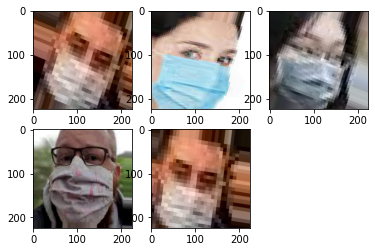

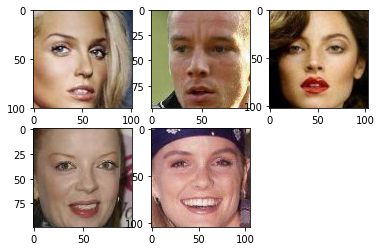

In [ ]:
directory=os.listdir('/content/drive/MyDrive/Face Mask Dataset/Train')
for each in directory:
    plt.figure()
    currentFolder = '/content/drive/MyDrive/Face Mask Dataset/Train/'+ each

    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        fullpath = currentFolder + "/" + file
        img=mpimg.imread(fullpath)
        plt.subplot(2,3 , i+1)
        plt.imshow(img)

In [ ]:
target_size=(128,128)
batch_size=32

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

train = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255
)

val = train_datagen.flow_from_directory(
    directory=val_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255
)

test = train_datagen.flow_from_directory(
    directory=test_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size
)


Found 10010 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mobilenet = MobileNetV2(weights = "imagenet",include_top = False,input_shape=(150,150,3))

for layer in mobilenet.layers:
    layer.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(300, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 300)               384300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               3

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics ="accuracy")

In [ ]:
history = model.fit(train,
                              validation_data=val,
                              steps_per_epoch=len(train)//64,
                              epochs=30,
                              validation_steps=len(val)//64,
                              verbose=2)

Epoch 1/30
4/4 - 110s - loss: 1.1606 - accuracy: 0.5547 - 110s/epoch - 28s/step
Epoch 2/30
4/4 - 20s - loss: 0.4524 - accuracy: 0.8281 - 20s/epoch - 5s/step
Epoch 3/30
4/4 - 20s - loss: 0.3341 - accuracy: 0.8906 - 20s/epoch - 5s/step
Epoch 4/30
4/4 - 19s - loss: 0.2156 - accuracy: 0.8906 - 19s/epoch - 5s/step
Epoch 5/30
4/4 - 19s - loss: 0.1991 - accuracy: 0.9375 - 19s/epoch - 5s/step
Epoch 6/30
4/4 - 17s - loss: 0.4115 - accuracy: 0.8672 - 17s/epoch - 4s/step
Epoch 7/30
4/4 - 18s - loss: 0.1769 - accuracy: 0.9609 - 18s/epoch - 5s/step
Epoch 8/30
4/4 - 18s - loss: 0.2035 - accuracy: 0.9609 - 18s/epoch - 5s/step
Epoch 9/30
4/4 - 18s - loss: 0.1637 - accuracy: 0.9766 - 18s/epoch - 5s/step
Epoch 10/30
4/4 - 21s - loss: 0.1807 - accuracy: 0.9453 - 21s/epoch - 5s/step
Epoch 11/30
4/4 - 14s - loss: 0.0988 - accuracy: 0.9609 - 14s/epoch - 3s/step
Epoch 12/30
4/4 - 17s - loss: 0.1694 - accuracy: 0.9531 - 17s/epoch - 4s/step
Epoch 13/30
4/4 - 17s - loss: 0.0953 - accuracy: 0.9531 - 17s/epoch - 

In [ ]:
loss, accuracy = model.evaluate(test)

31/31 [==============================] - 267s 9s/step - loss: 0.0468 - accuracy: 0.9869


In [ ]:
model.save('/content/drive/MyDrive/facemaskdetectionmodel.h5')